# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
## No-show appointments
> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

# Import

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>In this section, I will load in the data, check for cleanliness, and then trim and clean my dataset for analysis.
### General Properties

In [2]:
df = pd.read_csv('noshowappointment.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape
### We have 110527 Rows and 14 Colums 

(110527, 14)

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df.info()
### As we can see there is some issue with the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df["PatientId"].value_counts()

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
2.584244e+11    62
                ..
1.222828e+13     1
6.821231e+11     1
7.163981e+14     1
9.798964e+14     1
2.724571e+11     1
Name: PatientId, Length: 62299, dtype: int64

In [7]:
df["Age"].value_counts()
### -1 thats mean there is missing value 

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [8]:
df["ScheduledDay"].value_counts()
### I must change the data type from Int64 to datetime64

2016-05-06T07:09:54Z    24
2016-05-06T07:09:53Z    23
2016-04-25T17:17:46Z    22
2016-04-25T17:18:27Z    22
2016-04-25T17:17:23Z    19
                        ..
2016-05-17T13:56:57Z     1
2016-05-04T06:49:58Z     1
2016-06-01T09:18:03Z     1
2016-05-06T08:48:09Z     1
2016-05-24T15:27:27Z     1
Name: ScheduledDay, Length: 103549, dtype: int64

In [9]:
df["AppointmentDay"].value_counts()
### I must change the data type from Int64 to datetime64 

2016-06-06T00:00:00Z    4692
2016-05-16T00:00:00Z    4613
2016-05-09T00:00:00Z    4520
2016-05-30T00:00:00Z    4514
2016-06-08T00:00:00Z    4479
2016-05-11T00:00:00Z    4474
2016-06-01T00:00:00Z    4464
2016-06-07T00:00:00Z    4416
2016-05-12T00:00:00Z    4394
2016-05-02T00:00:00Z    4376
2016-05-18T00:00:00Z    4373
2016-05-17T00:00:00Z    4372
2016-06-02T00:00:00Z    4310
2016-05-10T00:00:00Z    4308
2016-05-31T00:00:00Z    4279
2016-05-05T00:00:00Z    4273
2016-05-19T00:00:00Z    4270
2016-05-03T00:00:00Z    4256
2016-05-04T00:00:00Z    4168
2016-06-03T00:00:00Z    4090
2016-05-24T00:00:00Z    4009
2016-05-13T00:00:00Z    3987
2016-05-25T00:00:00Z    3909
2016-05-06T00:00:00Z    3879
2016-05-20T00:00:00Z    3828
2016-04-29T00:00:00Z    3235
2016-05-14T00:00:00Z      39
Name: AppointmentDay, dtype: int64

In [10]:
df["SMS_received"].value_counts()
# We can see by the result of this code that 75045 of patient they did not recived SMS reminder and 35482 they recived SMS.

0    75045
1    35482
Name: SMS_received, dtype: int64

### Data Cleaning (Replace this with more specific notes!)

In [11]:
dfAge = df[df["Age"]<0]
### There was a -1 we solved that with this code 

In [12]:
df = df.drop(dfAge.index,axis=0)
### Any Age less then 0 in this code I will delete it, axis = 0 that mean it's Rows and 1 column

In [13]:
df["Age"].value_counts()
### Please see the reslut with below, Now there is no missing value

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

In [14]:
df["ScheduledDay"]= pd.to_datetime(df["ScheduledDay"])
### I will change the data type to Datatime

In [15]:
df["AppointmentDay"]= pd.to_datetime(df["AppointmentDay"])
### I will change the data type to Datatime

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hipertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handcap         110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  No-show       

,Age
count,110526.000000
mean,37.089219
std,23.110026
min,0.000000
25%,18.000000
50%,37.000000
75%,55.000000
max,115.000000


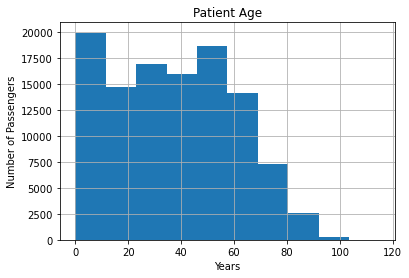

In [17]:
ax = df['Age'].hist()
ax.set_ylabel("Number of Passengers")
ax.set_xlabel("Years")
ax.set_title("Patient Age")
pd.DataFrame(df['Age'].describe())
### We can see in the chart the highest age they have it in hospital is between 0 and 10 years and for the lowest age is 100 and over years.

<a id='eda'></a>
## Exploratory Data Analysis


### What the most Gender they have an appointement and what is the mean average?

In [18]:
df["Gender"].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

In [19]:
dfGender = df["Gender"].value_counts()
np.mean(dfGender)
### The mean average of Gender

55263.0

Text(0.5, 1.0, 'Gender')

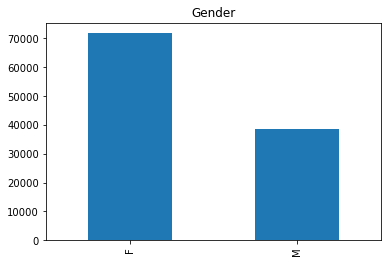

In [20]:
df["Gender"].value_counts().plot(kind='bar')
mp.title("Gender")
### We can see from the chart the Female it's 71839 and for Male it's 38686.

### What is the status of attendance the appointment?

In [21]:
df["No-show"].value_counts()

No     88207
Yes    22319
Name: No-show, dtype: int64

No-show
Gender Alcoholism          
F      0           0.797695
       1           0.748160
M      0           0.798741
       1           0.827328

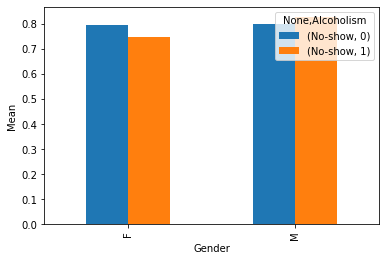

In [22]:
df["No-show"] = pd.get_dummies(df["No-show"])
df.groupby(["Gender","Alcoholism"])[["No-show"]].mean().unstack().plot(kind="bar").set_ylabel("Mean")
df.groupby(["Gender","Alcoholism"])[["No-show"]].mean()
### it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
### We can see in below chart that's the number of patient they attended the appointment it's 88208 and for No show up it's 22319
### Also we can see the man attend the appointment more then a women

### Do SMS reminders decrease the number of absences?

In [23]:
df["SMS_received"].value_counts()

0    75044
1    35482
Name: SMS_received, dtype: int64

<AxesSubplot:ylabel='SMS_received'>

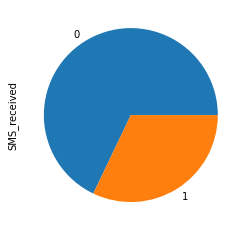

In [24]:
df["SMS_received"].value_counts().plot(kind='pie')
### We can see the in the chart that most of the patient they did not received SMS, 
### 67.1% patient did not received and 32.1% received SMS.

<a id='conclusions'></a>
## Conclusions

>First step of data analysis that I read the data after that I configure the issues with data. In column "Age" I found missing value -1 and that missing values will not influence the results of the analysis I sloved it already. "Scheduled Day" I found the data type not match with the data inside the column so I change it, same issue with the "Appointment Day". I configure a Question to answer it from the analysis. First question is What the most gender they have an appointment and what is the mean average?. Second What is the status of attendance the appointment?. I used the gender and No show column to present them in a chart. In addition, I found the female it's more than 50% of male who's attend the appointment is more than the people that they did not show up.
